In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('merged_data.xlsx')
df1

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,GDP Per Capita (US$),Code Value
0,Asia,Western Asia,Turkey,6.89,6.40,7.0,9.0,9.0,4.0,3.0,...,6.5,2.0,4.0,4.0,3.5,3.5,2021,US$,9661.23,TUR
1,Africa,West Africa,Cabo Verde,4.04,3.70,4.5,2.0,2.5,2.5,4.0,...,7.5,5.0,6.0,3.5,6.0,7.0,2021,US$,3293.23,CPV
2,Africa,Southern Africa,South Africa,6.63,6.00,4.5,4.0,8.0,3.5,7.5,...,6.0,6.0,6.0,4.0,5.0,7.0,2021,US$,7055.06,ZAF
3,South America,South America,Colombia,7.66,7.20,7.5,7.0,8.0,6.0,7.0,...,4.5,6.0,5.0,3.5,4.5,6.5,2021,US$,6104.14,COL
4,South America,South America,Peru,6.35,6.20,7.0,6.0,5.5,7.0,5.5,...,5.0,4.5,4.0,3.5,3.0,4.5,2021,US$,6621.65,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,North America,Caribbean,Jamaica,5.91,4.20,5.0,3.0,8.5,1.5,2.0,...,6.5,4.5,4.5,5.0,6.0,6.5,2021,US$,5183.58,JAM
189,North America,Caribbean,St. Vincent and the Grenadines,3.30,2.85,2.5,1.0,4.0,1.0,2.0,...,6.0,5.5,4.0,3.0,6.0,6.0,2021,US$,8440.03,VCT
190,Europe,Central & Eastern Europe,Slovenia,4.29,3.95,4.0,5.5,3.5,2.0,3.0,...,7.5,6.5,5.0,6.0,6.0,6.0,2021,US$,29134.80,SVN
191,North America,Caribbean,St. Lucia,4.09,3.05,4.0,1.5,5.0,2.0,1.0,...,5.5,4.0,5.5,5.0,6.0,4.0,2021,US$,9824.06,LCA


In [8]:
print(df1.dtypes)

Continent                                      object
Region                                         object
Country                                        object
Criminality                                   float64
Criminal markets                              float64
Human trafficking                             float64
Human smuggling                               float64
Arms trafficking                              float64
Flora crimes                                  float64
Fauna crimes                                  float64
Non-renewable resource crimes                 float64
Heroin trade                                  float64
Cocaine trade                                 float64
Cannabis trade                                float64
Synthetic drug trade                          float64
Criminal actors                               float64
Mafia-style groups                            float64
Criminal networks                             float64
State-embedded actors       

In [16]:
missing_values = df1.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Continent                                     0
Region                                        0
Country                                       0
Criminality                                   0
Criminal markets                              0
Human trafficking                             0
Human smuggling                               0
Arms trafficking                              0
Flora crimes                                  0
Fauna crimes                                  0
Non-renewable resource crimes                 0
Heroin trade                                  0
Cocaine trade                                 0
Cannabis trade                                0
Synthetic drug trade                          0
Criminal actors                               0
Mafia-style groups                            0
Criminal networks                             0
State-embedded actors                         0
Foreign actors                                0
Resilien

In [18]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns    
#select_dtypes(include=[np.number]). This function selects columns based on their data types, specifically including numerical data types such as integers and floats.   
df1[numerical_cols] = df1[numerical_cols].fillna(df1[numerical_cols].mean())
#It then fills missing values in these numerical columns with the mean of each respective column using the fillna() method.


In [20]:
df1.rename(columns={'GDP Per Capita (US$)': 'GDP_per_capita'}, inplace=True)

In [22]:
#Correlation Coefficient
correlation = df1['GDP_per_capita'].corr(df1['Criminality'])
print("Correlation between the GDP per capita and the criminality index:",correlation)
#it to the case when there's a perfect negative linear relationship between x and y.

Correlation between the GDP per capita and the criminality index: -0.3486143681276767


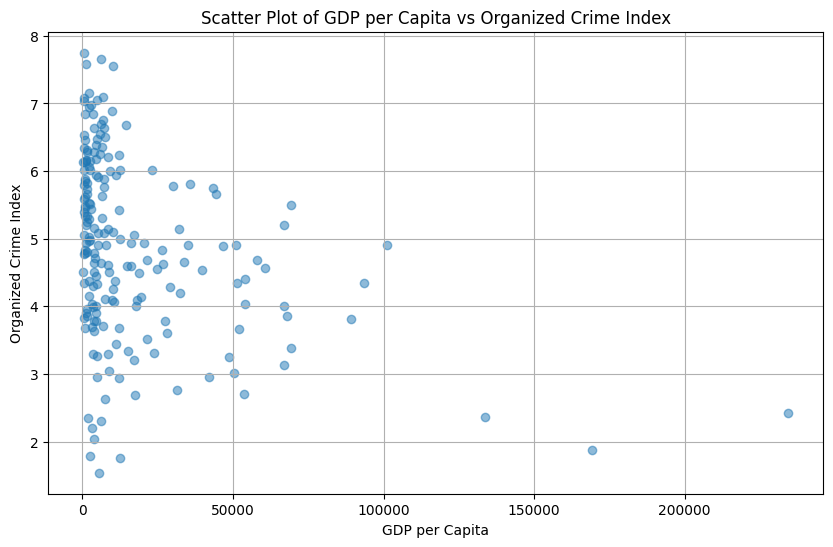

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df1['GDP_per_capita'],df1["Criminality"], alpha=0.5)
plt.title('Scatter Plot of GDP per Capita vs Organized Crime Index')
plt.xlabel('GDP per Capita')
plt.ylabel('Organized Crime Index')
plt.grid(True)
plt.show()

In [32]:
# Grouping data by 'Continent' to analyze regional differences
import seaborn as sns
regional_group = df1.groupby('Continent').agg({
    'GDP_per_capita':'mean',
    'Criminality':'mean'
}).reset_index()   

#The reset_index() method in pandas is used to reset the index of a DataFrame

In [33]:
numerical_cols = df1.select_dtypes(include=[np.number])
print("Descriptive Statistics for Numerical Data:")
print(numerical_cols.describe())

Descriptive Statistics for B=Numerical Data
       Criminality  Criminal markets  Human trafficking  Human smuggling  \
count   193.000000        193.000000         193.000000        193.00000   
mean      4.872383          4.650777           5.582902          4.76943   
std       1.326322          1.272582           1.679648          1.91416   
min       1.540000          1.600000           1.500000          1.00000   
25%       4.000000          3.850000           4.500000          3.00000   
50%       4.900000          4.750000           5.500000          5.00000   
75%       5.890000          5.650000           7.000000          6.50000   
max       7.750000          8.000000           9.500000          9.50000   

       Arms trafficking  Flora crimes  Fauna crimes  \
count        193.000000    193.000000    193.000000   
mean           4.919689      3.878238      4.634715   
std            2.105307      2.315469      1.921639   
min            1.000000      1.000000      1.000000

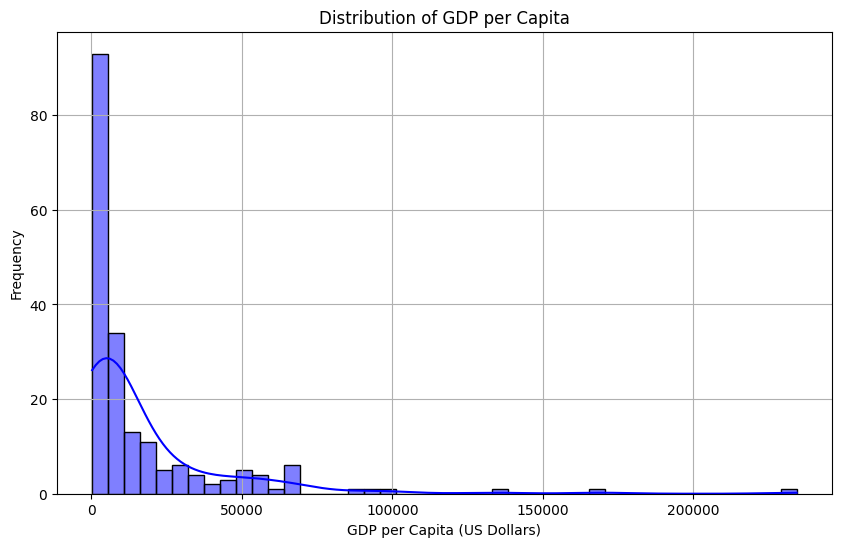

In [37]:
#This shows the distribution of GDP per Capita
plt.figure(figsize=(10, 6))
sns.histplot(df1['GDP_per_capita'], kde=True, color='blue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita (US Dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

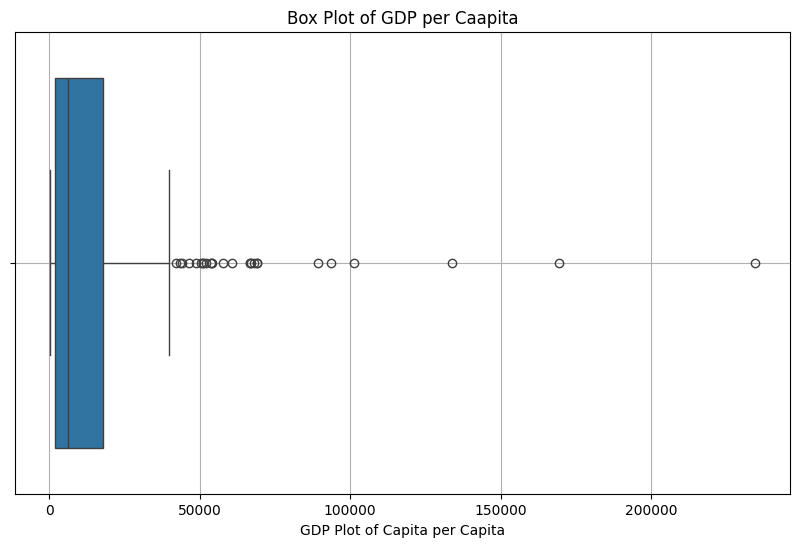

In [38]:
#Box plot for GDP per capita to identify the outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['GDP_per_capita'])
plt.title('Box Plot of GDP per Caapita')
plt.xlabel('GDP Plot of Capita per Capita')
plt.grid(True)
plt.show()

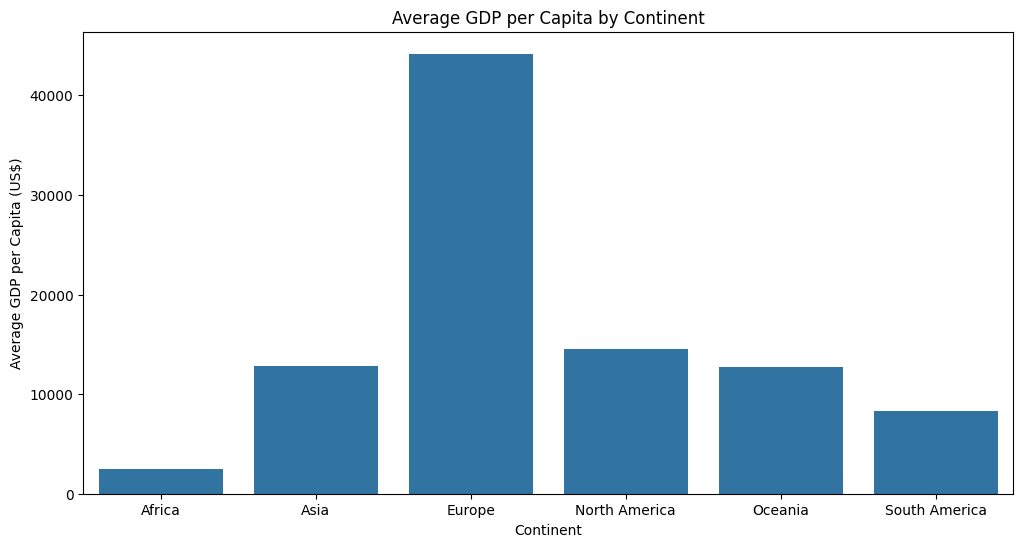

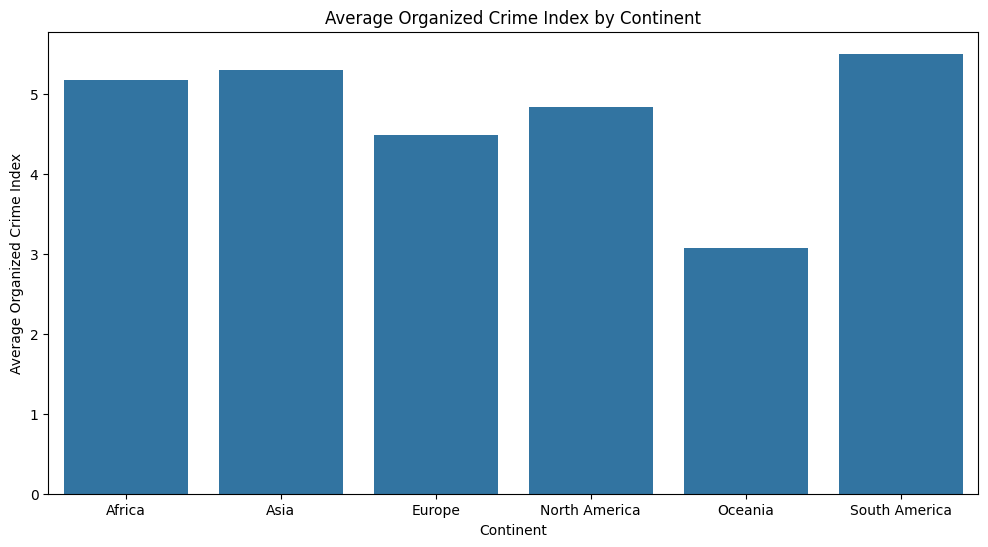

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='GDP_per_capita', data=regional_group)
plt.title('Average GDP per Capita by Continent')
plt.ylabel('Average GDP per Capita (US$)')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Criminality', data=regional_group)
plt.title('Average Organized Crime Index by Continent')
plt.ylabel('Average Organized Crime Index')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Calculating correlation within each continent
continents = df1['Continent'].unique()    #unique method would only select those continents uniquely without repetition.
for continent in continents:
    subset = df1[df1['Continent'] == continent]
    correlation = subset['GDP_per_capita'].corr(subset['Criminality'])
    print(f"Correlation between GDP per capita and organized crime in {continent}: {correlation:.2f}")

Correlation between GDP per capita and organized crime in Asia: -0.33
Correlation between GDP per capita and organized crime in Africa: -0.30
Correlation between GDP per capita and organized crime in South America: -0.64
Correlation between GDP per capita and organized crime in North America: -0.18
Correlation between GDP per capita and organized crime in Europe: -0.65
Correlation between GDP per capita and organized crime in Oceania: 0.17


In [45]:
# Exploring governance factors by continent
governance_factors = ['Political leadership and governance', 'Government transparency and accountability', 'International cooperation']
continent_governance = df1.groupby('Continent')[governance_factors].mean().reset_index()

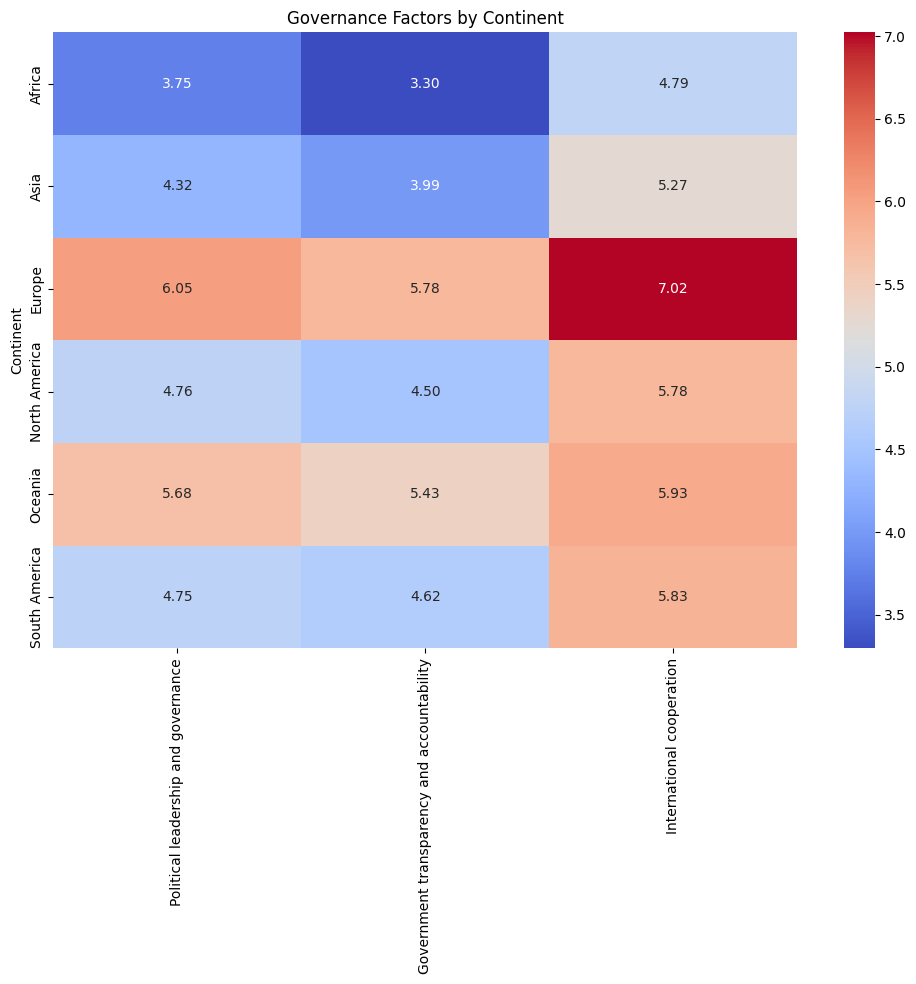

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(continent_governance.set_index('Continent'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Governance Factors by Continent')
plt.show()

In [47]:
# Correctly select columns related to resilience and governance factors
resilience_governance_columns = df1.columns[df1.columns.str.contains('leadership|transparency|cooperation|policies|judicial|law enforcement|territorial|integrity|money laundering|regulatory|support|prevention')]


In [48]:
# Filter the DataFrame to include only numeric columns for correlation calculation
numeric_df = df1[resilience_governance_columns].select_dtypes(include=[np.number])

In [49]:
numeric_df

,Political leadership and governance,Government transparency and accountability,International cooperation,National policies and laws,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support
0,3.0,3.0,3.5,4.5,6.5,2.0,4.0,4.0
1,6.5,6.0,8.5,7.0,7.5,5.0,6.0,3.5
2,6.0,5.5,6.5,6.5,6.0,6.0,6.0,4.0
3,7.0,5.5,9.0,7.0,4.5,6.0,5.0,3.5
4,3.0,5.5,5.0,6.0,5.0,4.5,4.0,3.5
...,...,...,...,...,...,...,...,...
188,5.0,5.5,6.5,5.5,6.5,4.5,4.5,5.0
189,6.0,6.0,6.0,6.5,6.0,5.5,4.0,3.0
190,6.0,5.0,6.5,6.5,7.5,6.5,5.0,6.0
191,7.5,6.5,6.5,6.5,5.5,4.0,5.5,5.0


In [51]:
# Calculating the correlation matrix for resilience and governance factors with the organized crime index
correlation_matrix = numeric_df.join(df1['Criminality']).corr()

In [52]:
correlation_matrix

,Political leadership and governance,Government transparency and accountability,International cooperation,National policies and laws,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Criminality
Political leadership and governance,1.000000,0.871555,0.805809,0.834768,0.732597,0.719293,0.768100,0.753358,-0.490887
Government transparency and accountability,0.871555,1.000000,0.843016,0.830748,0.704711,0.756305,0.786285,0.789386,-0.467097
International cooperation,0.805809,0.843016,1.000000,0.851945,0.678891,0.747885,0.771237,0.769248,-0.286804
National policies and laws,0.834768,0.830748,0.851945,1.000000,0.725738,0.775929,0.776137,0.776546,-0.432648
Territorial integrity,0.732597,0.704711,0.678891,0.725738,1.000000,0.698882,0.729612,0.687587,-0.441328
Anti-money laundering,0.719293,0.756305,0.747885,0.775929,0.698882,1.000000,0.791036,0.679617,-0.319440
Economic regulatory capacity,0.768100,0.786285,0.771237,0.776137,0.729612,0.791036,1.000000,0.803222,-0.320645
Victim and witness support,0.753358,0.789386,0.769248,0.776546,0.687587,0.679617,0.803222,1.000000,-0.367162
Criminality,-0.490887,-0.467097,-0.286804,-0.432648,-0.441328,-0.319440,-0.320645,-0.367162,1.000000


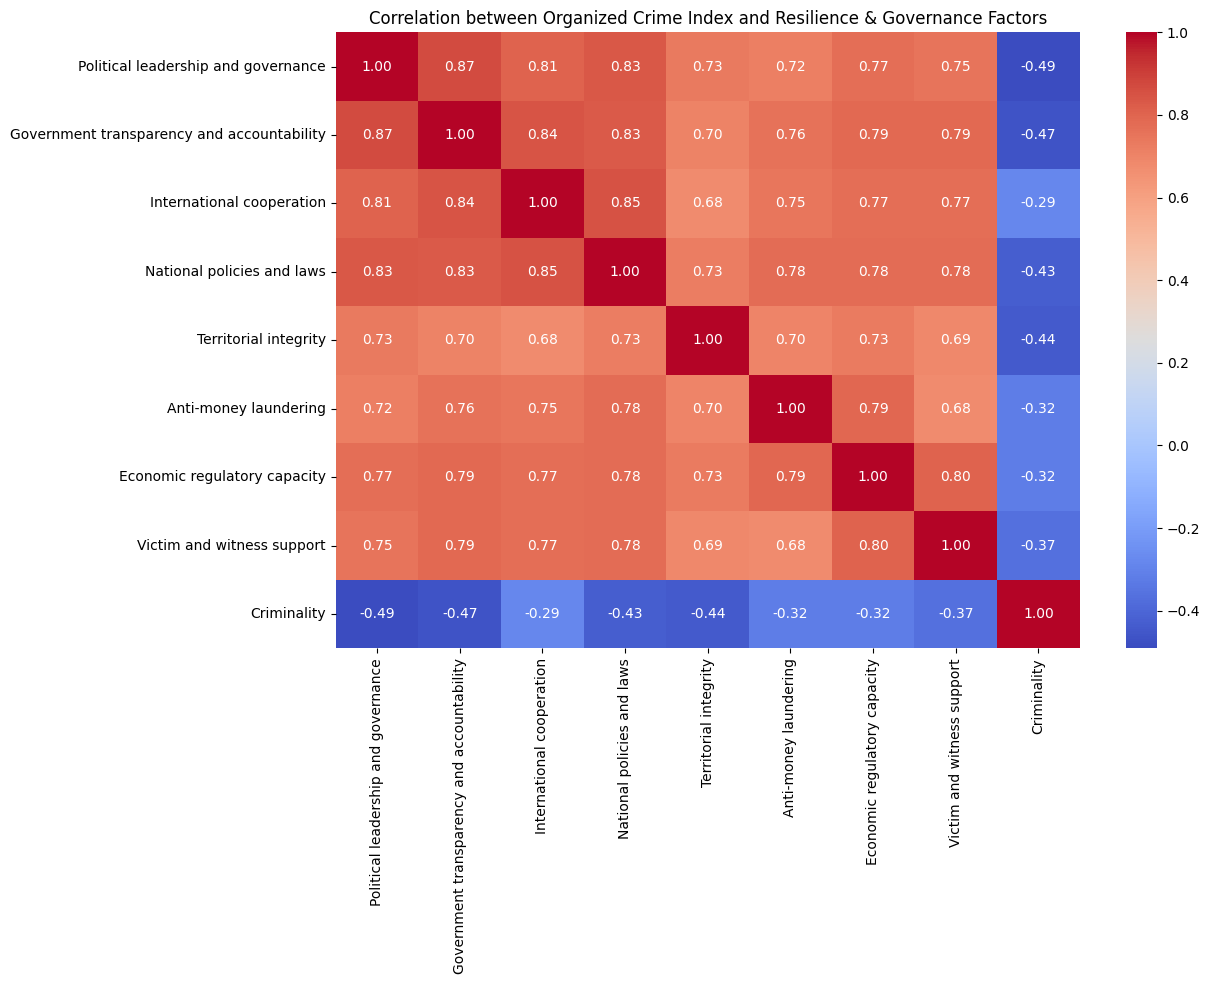

In [53]:
#Trying to visualize the correlation matrix using the heatmap.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Organized Crime Index and Resilience & Governance Factors')
plt.show()

In [54]:
# Analyzing the impact of resilience and governance factors on organized crime
print("Correlation coefficients between organized crime index and resilience & governance factors:")
print(correlation_matrix['Criminality'].drop('Criminality').sort_values(ascending=False))

Correlation coefficients between organized crime index and resilience & governance factors:
International cooperation                    -0.286804
Anti-money laundering                        -0.319440
Economic regulatory capacity                 -0.320645
Victim and witness support                   -0.367162
National policies and laws                   -0.432648
Territorial integrity                        -0.441328
Government transparency and accountability   -0.467097
Political leadership and governance          -0.490887
Name: Criminality, dtype: float64


In [56]:
import plotly.express as px

In [65]:
#Creating a choropleth chart.
fig1 = px.choropleth(df1, locations = 'Country', color = 'Criminality', scope='world')

In [66]:
#Creating a scatter chart
fig2 = px.scatter(df1, x='GDP_per_capita', y='Criminality', trendline='ols')

In [67]:
#Creating a line chart
fig3 = px.line(df1, x='Year', y='Criminality')

In [68]:
#Creating a bar chart
fig4 = px.bar(df1, x='Criminal markets', y='Criminality')

In [69]:
# Creating a heatmap
numeric_df = df1.select_dtypes(include=['float64', 'int64'])
fig5 = px.imshow(numeric_df.corr())

# Creating a pie chart
fig6 = px.pie(df1, values='Criminality', names='Criminal markets')

# Creating a histogram
fig7 = px.histogram(df1['Criminality'])

# Creating a box plot
fig8 = px.box(df1, y='Criminality', x='Region')

# Showing the graphs
figs = [fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8]
for fig in figs:
    fig.show()